In [2]:
import csv
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-1/FoDS/insurance_dataset.csv'
ds = pd.read_csv(filename)

In [3]:
mean1 = int(ds['age'].mean())
mean2 = int(ds['bmi'].mean())
mean3 = int(ds['children'].mean())
mean4 = int(ds['charges'].mean())
print(mean1, mean2, mean3, mean4)
std1 = int(ds['age'].std())
std2 = int(ds['bmi'].std())
std3 = int(ds['children'].std())
std4 = int(ds['charges'].std())
print(std1, std2, std3, std4)

39 30 1 13270
14 6 1 12110


In [4]:
ds['age'] = (ds['age']-mean1)/std1
ds['bmi'] = (ds['bmi']-mean2)/std2
ds['children'] = (ds['children']-mean3)/std3
ds['charges'] = (ds['charges']-mean4)/std4
ds.head()

,age,bmi,children,charges
0,-1.428571,-0.350000,-1.0,0.298507
1,-1.500000,0.628333,0.0,-0.953299
2,-0.785714,0.500000,2.0,-0.728368
3,-0.428571,-1.215833,-1.0,0.719609
4,-0.500000,-0.186667,-1.0,-0.776478


In [5]:
dsR = {}
k = 20
for i in range(k):
    dsR['R{}'.format(i+1)] = ds.sample(frac = 1)

In [59]:
train_ds_count = int(0.7 * len(ds))
print(train_ds_count)
train_dsR, test_dsR = {}, {}
for i in range(k):
    train_dsR['R{}'.format(i+1)] = dsR['R{}'.format(i+1)][:train_ds_count]
    test_dsR['R{}'.format(i+1)] = dsR['R{}'.format(i+1)][train_ds_count:]
train_dsR['R1'].head()

936


,age,bmi,children,charges
985,0.357143,-0.700000,0.0,-0.466174
628,1.357143,1.333333,-1.0,-0.157229
1040,-0.285714,-0.329167,-1.0,0.575133
1212,-1.500000,-1.421667,-1.0,-0.955206
870,0.785714,1.033333,-1.0,-0.397373


In [77]:
x0 = np.ones(train_ds_count, dtype = int)
x1R, x2R, x3R, y_trainR, XR = {}, {}, {}, {}, {}
for i in range(k):
    x1R['R{}'.format(i+1)], x2R['R{}'.format(i+1)], x3R['R{}'.format(i+1)], y_trainR['R{}'.format(i+1)] = train_dsR['R{}'.format(i+1)]['age'], train_dsR['R{}'.format(i+1)]['bmi'], train_dsR['R{}'.format(i+1)]['children'], train_dsR['R{}'.format(i+1)]['charges']
    XR['R{}'.format(i+1)] = np.array([x0, x1R['R{}'.format(i+1)], x2R['R{}'.format(i+1)], x3R['R{}'.format(i+1)]])
for i in range(k):
    y_trainR['R{}'.format(i+1)] = y_trainR['R{}'.format(i+1)].reset_index(drop=True)
print(y_trainR['R1'][3])

-0.9552060033030554


In [8]:
W_normalR = {}
for i in range(k):    
    W_normalR['R{}'.format(i+1)] = np.dot(np.linalg.inv(np.dot(XR['R{}'.format(i+1)], XR['R{}'.format(i+1)].T)), np.dot(XR['R{}'.format(i+1)], y_trainR['R{}'.format(i+1)]))
for i in range(k):
    print(W_normalR['R{}'.format(i+1)])

[-0.02938125  0.29332136  0.12622002  0.02215773]
[0.00440675 0.27394381 0.19070673 0.02840015]
[-0.01692638  0.27011751  0.19017596  0.05499424]
[-0.01231622  0.27409953  0.16048422  0.02853915]
[-0.03844122  0.28551433  0.14897443  0.0450398 ]
[-0.01020183  0.28947599  0.19022943  0.04170041]
[-0.02097214  0.26974831  0.15981701  0.05707921]
[-0.0390862   0.27789259  0.14587068  0.0571601 ]
[-0.01076252  0.25668108  0.14939055  0.03873793]
[-0.02365059  0.27606275  0.16140216  0.03811911]
[0.00427248 0.28294117 0.17955221 0.02220893]
[-0.00614964  0.27804295  0.18589676  0.04524338]
[-0.02128375  0.28771512  0.14805137  0.02060368]
[-0.0080569   0.25780875  0.17538708  0.01199404]
[-0.0127002   0.26544284  0.18793938  0.05886282]
[-0.01552167  0.27297447  0.13350564  0.03811276]
[-0.01416542  0.27994022  0.17015813  0.04926576]
[-0.04486774  0.28147791  0.17436753  0.05835933]
[-0.03612173  0.28129041  0.16340712  0.05060015]
[-0.03903455  0.27953309  0.13736405  0.0416726 ]


In [87]:
iterations = 1000
learn_rate = 0.001
costR, costsR, delER, W_GDR = {}, {}, {}, {}
for i in range(k):
    W_GDR['R{}'.format(i+1)] = np.zeros(4)
    costsR['R{}'.format(i+1)] = []
for i in range(k):
    for _ in range(iterations):    
        delER['R{}'.format(i+1)] = np.dot((np.dot(XR['R{}'.format(i+1)].T, W_GDR['R{}'.format(i+1)]) - y_trainR['R{}'.format(i+1)]), XR['R{}'.format(i+1)].T)
        costR['R{}'.format(i+1)] = (1/(2*train_ds_count)*np.sum(np.square(np.dot(XR['R{}'.format(i+1)].T, W_GDR['R{}'.format(i+1)]) - y_trainR['R{}'.format(i+1)])))
        costsR['R{}'.format(i+1)].append(costR['R{}'.format(i+1)])
        W_GDR['R{}'.format(i+1)] -= learn_rate*delER['R{}'.format(i+1)]

for i in range(k):
    print(W_normalR['R{}'.format(i+1)])

[-0.02938125  0.29332136  0.12622002  0.02215773]
[0.00440675 0.27394381 0.19070673 0.02840015]
[-0.01692638  0.27011751  0.19017596  0.05499424]
[-0.01231622  0.27409953  0.16048422  0.02853915]
[-0.03844122  0.28551433  0.14897443  0.0450398 ]
[-0.01020183  0.28947599  0.19022943  0.04170041]
[-0.02097214  0.26974831  0.15981701  0.05707921]
[-0.0390862   0.27789259  0.14587068  0.0571601 ]
[-0.01076252  0.25668108  0.14939055  0.03873793]
[-0.02365059  0.27606275  0.16140216  0.03811911]
[0.00427248 0.28294117 0.17955221 0.02220893]
[-0.00614964  0.27804295  0.18589676  0.04524338]
[-0.02128375  0.28771512  0.14805137  0.02060368]
[-0.0080569   0.25780875  0.17538708  0.01199404]
[-0.0127002   0.26544284  0.18793938  0.05886282]
[-0.01552167  0.27297447  0.13350564  0.03811276]
[-0.01416542  0.27994022  0.17015813  0.04926576]
[-0.04486774  0.28147791  0.17436753  0.05835933]
[-0.03612173  0.28129041  0.16340712  0.05060015]
[-0.03903455  0.27953309  0.13736405  0.0416726 ]


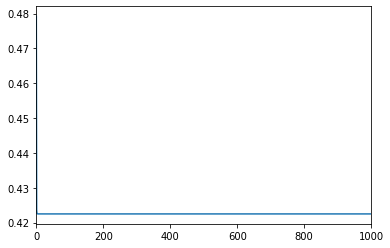

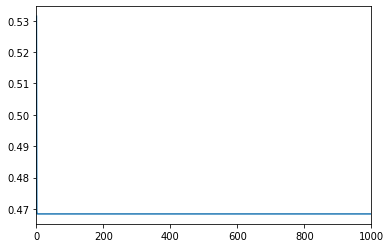

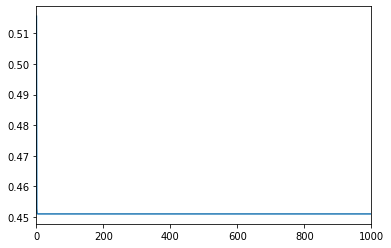

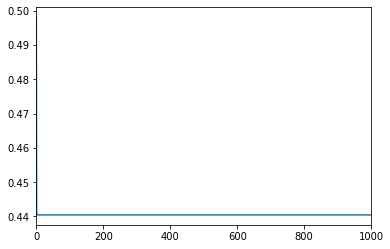

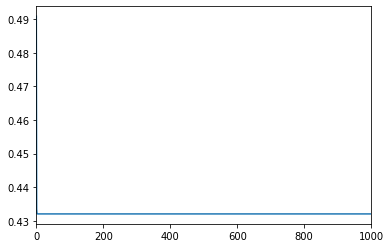

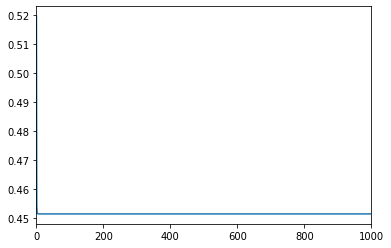

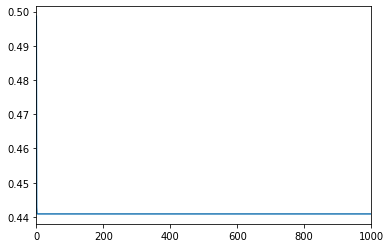

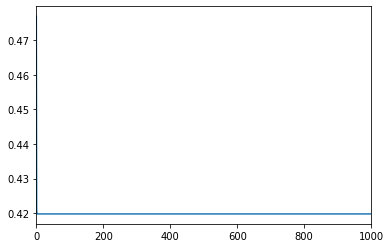

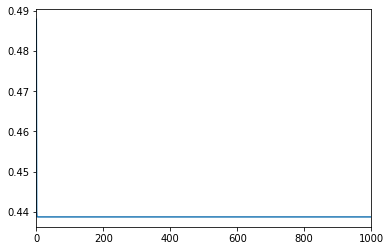

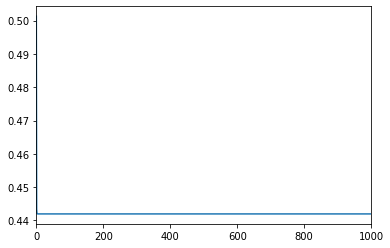

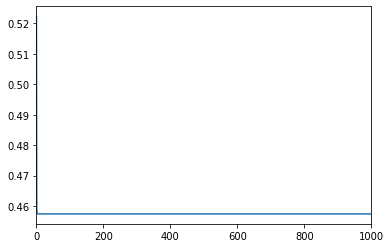

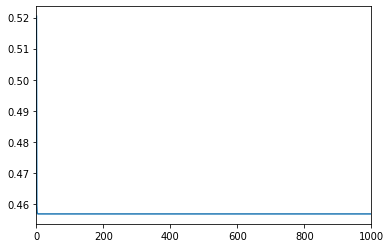

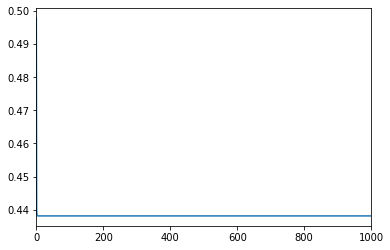

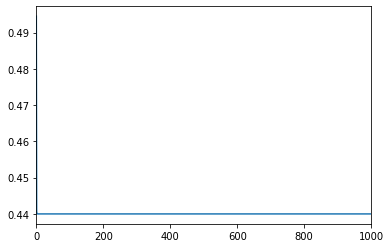

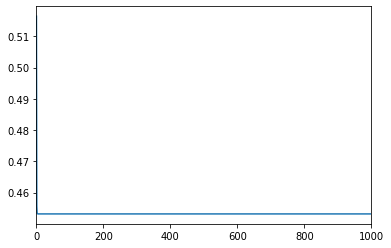

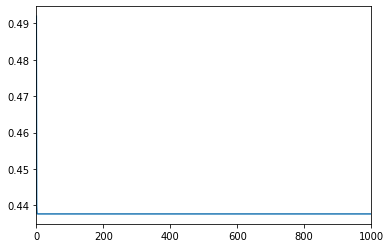

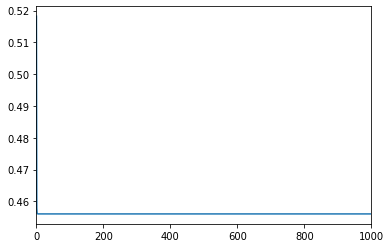

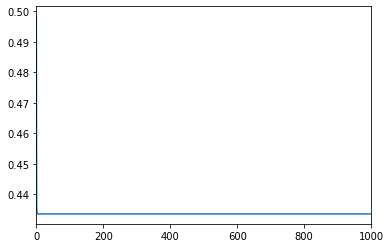

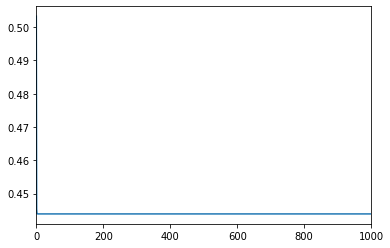

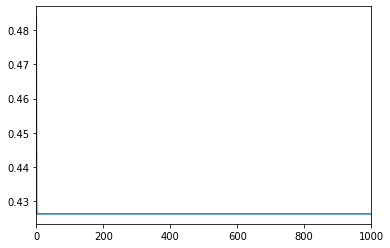

In [88]:
for i in range(k):    
    plt.plot(costsR['R{}'.format(i+1)]) 
    plt.xlim([0, iterations])
    plt.show()

In [89]:
import random
random.seed(7)
p = random.randrange(0, train_ds_count)
cost_SGDR, costs_SGDR, W_SGDR, delSER = {}, {}, {}, {}
for i in range(k):
    W_SGDR['R{}'.format(i+1)] = np.zeros(4)
    costs_SGDR['R{}'.format(i+1)] = []
    
for i in range(k):
    for _ in range(iterations): 
        delSER['R{}'.format(i+1)] = np.dot(np.dot(XR['R{}'.format(i+1)].T[p], W_SGDR['R{}'.format(i+1)]) - y_trainR['R{}'.format(i+1)][p], XR['R{}'.format(i+1)].T[p])
        cost_SGDR['R{}'.format(i+1)] = (1/2)*np.square(np.dot(XR['R{}'.format(i+1)].T[p], W_SGDR['R{}'.format(i+1)]) - y_trainR['R{}'.format(i+1)][p])
        costs_SGDR['R{}'.format(i+1)].append(cost_SGDR['R{}'.format(i+1)])
        W_SGDR['R{}'.format(i+1)] -= learn_rate*delSER['R{}'.format(i+1)]

print(W_SGDR['R1'])

[-0.01306331 -0.0158626  -0.00831698 -0.01306331]


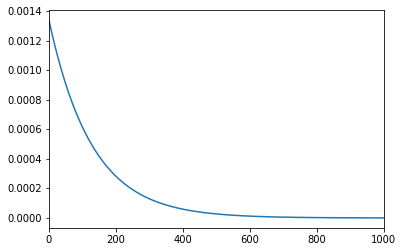

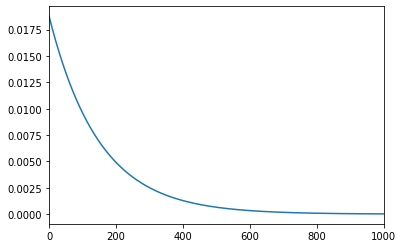

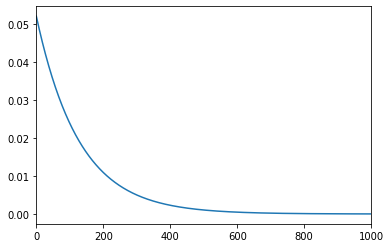

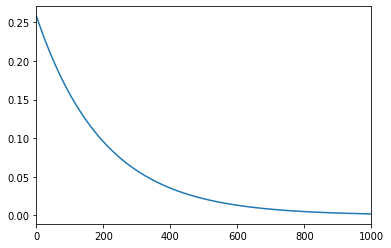

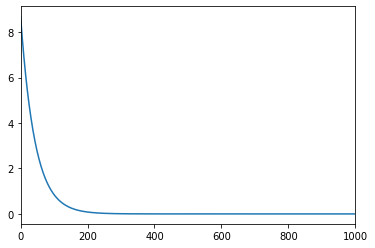

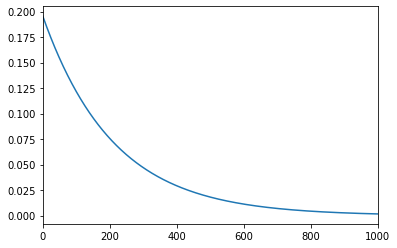

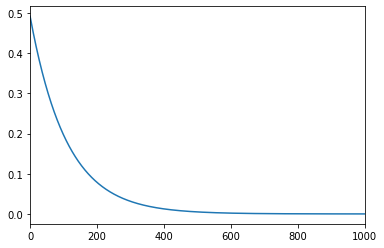

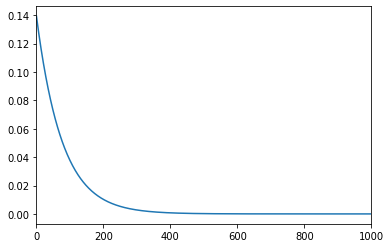

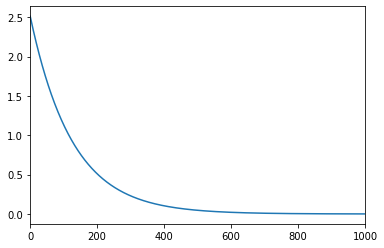

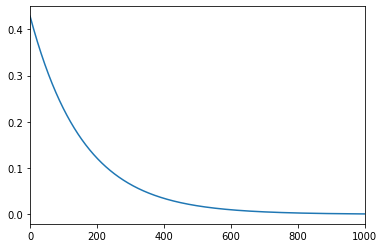

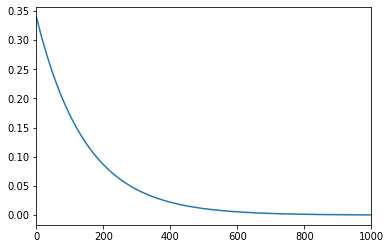

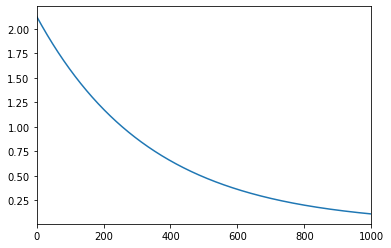

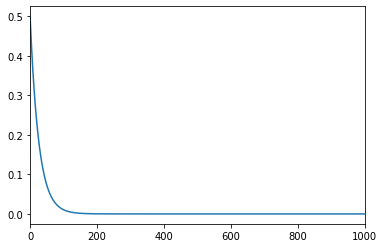

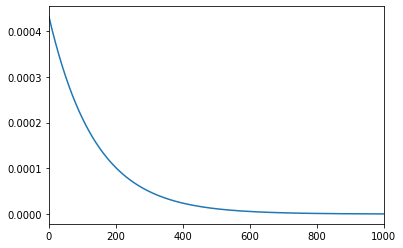

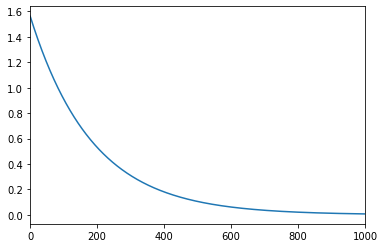

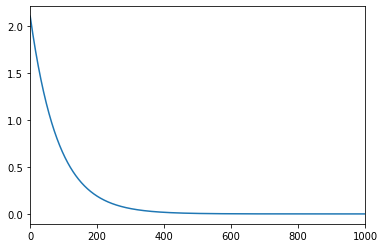

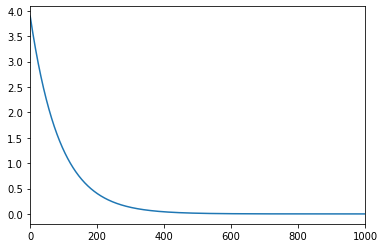

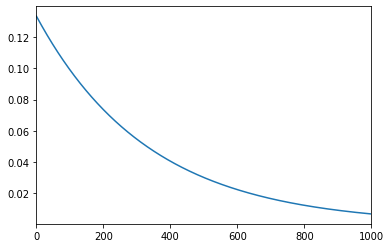

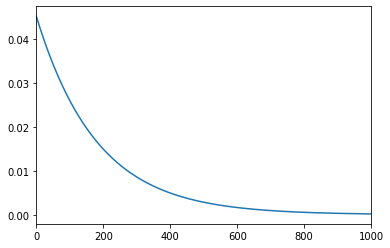

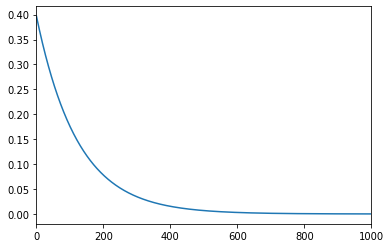

In [90]:
for i in range(k):    
    plt.plot(costs_SGDR['R{}'.format(i+1)]) 
    plt.xlim([0, iterations])
    plt.show()